___
# Ciência dos Dados - PROJETO 1

## Juan Jorge Garcia - 2B
___

## Análise socioeconômica das Regiões Brasileiras e o Acesso a Tecnologia

___
## Introdução

Com esse projeto tenho o intuito de explorar a população brasileira nas diferentes regiões, analisando como é o
perfil socioeconômico médio de um individuo em cada regiao, sua renda, area onde mora (urbana ou rural)
e no que isso influencia suas relações com tecnologia como internet e celular (3G, banda larga, discada). 
Tudo isso vem com o propósito de encontrar uma oportunidade(s) de investimento de uma empresa de telecomunicações
com base no indivíduo médio e suas relações com tecnologia e internet.



___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\juanj\OneDrive\Documentos\GitHub\CD\Projeto 01


In [3]:
dados2013=pd.read_table("PNAD DOM2013\\DOM2013csv\\DOM2013.csv", encoding="windows-1252", sep=",")
#dados2013=pd.read_table("PNAD DOM2013\\DOM2013csv\\DOM2013.csv", encoding="windows-1252", sep=",")

In [4]:
# SEPARANDO OS DOMICILIOS POR REGIOES
dados2013.shape
dados2013.loc[(dados2013.UF>10)&(dados2013.UF<20),"REGIAO"] = "Norte"
dados2013.loc[(dados2013.UF>20)&(dados2013.UF<30),"REGIAO"] = "Nordeste"
dados2013.loc[(dados2013.UF>40)&(dados2013.UF<44),"REGIAO"] = "Sul"
dados2013.loc[(dados2013.UF>30)&(dados2013.UF<35),"REGIAO"] = "Sudeste"
dados2013.loc[(dados2013.UF>49)&(dados2013.UF<54),"REGIAO"] = "Centro-Oeste"


In [5]:
#CRIANDO UM FILTRO PARA REGIÕES URBANAS E RURAIS

dados2013.loc[(dados2013.V4105>=1)&(dados2013.V4105<=3),"URBANIZACAO"] = "Urbana"
dados2013.loc[(dados2013.V4105>3)&(dados2013.V4105<=8),"URBANIZACAO"] = "Rural"



In [6]:
# CRIANDO UM FILTRO PARA RENDIMENTO MENSAL DOMICILIAR EM SALARIOS MINIMOS 

dados2013 = dados2013.rename(columns = {"V4614":"RENDA"})
dados2013.loc[(dados2013.RENDA>=1)&(dados2013.RENDA<=(937*(1/2))),"SALARIOS MINIMOS"] = "Até 1/2 salarios"
dados2013.loc[(dados2013.RENDA>(937*(1/2)))&(dados2013.RENDA<=937),"SALARIOS MINIMOS"] = "Entre 1/2 e 1 salario"
dados2013.loc[(dados2013.RENDA>937)&(dados2013.RENDA<=937*2),"SALARIOS MINIMOS"] = "Entre 1 e 2 salarios"
dados2013.loc[(dados2013.RENDA>937*2)&(dados2013.RENDA<=937*3),"SALARIOS MINIMOS"] = "Entre 2 e 3 salarios"
dados2013.loc[(dados2013.RENDA>937*3)&(dados2013.RENDA<=937*5),"SALARIOS MINIMOS"] = "Entre 3 e 5 salarios"
dados2013.loc[(dados2013.RENDA>937*5)&(dados2013.RENDA<=937*10),"SALARIOS MINIMOS"] = "Entre 5 e 10 salarios"
dados2013.loc[(dados2013.RENDA>937*10),"SALARIOS MINIMOS"] = "Mais que 10 salarios"



In [7]:
# CRIANDO UM FILTRO PARA AS PESSOAS QUE TEM ACESSO A INTERNET NO PROPRIO DOMICILIO

dados2013.loc[(dados2013.V02322 == 2),"ACESSO A INTERNET"] = "Sim"
dados2013.loc[(dados2013.V02322 == 4),"ACESSO A INTERNET"] = "Nao"


In [8]:
# CRIANDO UM FILTRO PARA O TIPO DE ACESSO DE INTERNET 

dados2013.loc[(dados2013.V02426 == 4),"BANDA LARGA"] = "Nao"
dados2013.loc[(dados2013.V02425 == 4),"CONEXAO DISCADA"] = "Nao"
dados2013.loc[(dados2013.V02424 == 4),"3G"] = "Nao"
dados2013.loc[(dados2013.V02426 == 2),"BANDA LARGA"] = "Sim"
dados2013.loc[(dados2013.V02425 == 2),"CONEXAO DISCADA"] = "Sim"
dados2013.loc[(dados2013.V02424 == 2),"3G"] = "Sim"




In [9]:
# CRIANDO UM FILTRO PARA AS PESSOAS QUE TEM ACESSO A CELULAR NO PROPRIO DOMICILIO
dados2013.loc[(dados2013.V0220 == 2),"ACESSO A CELULAR"] = "Sim"
dados2013.loc[(dados2013.V0220 == 4),"ACESSO A CELULAR"] = "Nao"



In [10]:
dados_interesse = dados2013.loc[:, ["REGIAO","URBANIZACAO","RENDA","SALARIOS MINIMOS",
                                    "ACESSO A INTERNET","ACESSO A CELULAR","CONEXAO DISCADA","BANDA LARGA","3G"]]





In [11]:
dados_interesse.head(10)


,REGIAO,URBANIZACAO,RENDA,SALARIOS MINIMOS,ACESSO A INTERNET,ACESSO A CELULAR,CONEXAO DISCADA,BANDA LARGA,3G
0,Norte,Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Norte,Urbana,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Norte,Urbana,350.0,Até 1/2 salarios,Nao,Sim,NaN,NaN,NaN
3,Norte,Urbana,678.0,Entre 1/2 e 1 salario,Nao,Sim,NaN,NaN,NaN
4,Norte,Urbana,800.0,Entre 1/2 e 1 salario,Nao,Sim,NaN,NaN,NaN
5,Norte,Urbana,800.0,Entre 1/2 e 1 salario,Nao,Sim,NaN,NaN,NaN
6,Norte,Urbana,1234.0,Entre 1 e 2 salarios,Nao,Sim,NaN,NaN,NaN
7,Norte,Urbana,4000.0,Entre 3 e 5 salarios,Sim,Sim,Sim,Sim,Sim
8,Norte,Urbana,3500.0,Entre 3 e 5 salarios,Sim,Sim,Sim,Nao,Sim
9,Norte,Urbana,1300.0,Entre 1 e 2 salarios,Sim,Sim,Nao,Sim,Nao


In [30]:
#filtrando os NaN da nossa base de dados
dados_interesse = dados_interesse[pd.notnull(dados_interesse['ACESSO A INTERNET'])][pd.notnull(dados_interesse['RENDA'])]

#quem nao tem internet fica com NaN nas perguntas sobre como acessa a intenet

In [13]:
print("Describe da renda de 2013\n",dados_interesse.RENDA.describe())


Describe da renda de 2013
 count    1.161920e+05
mean     4.737848e+10
std      2.124480e+11
min      0.000000e+00
25%      1.000000e+03
50%      1.878000e+03
75%      3.510250e+03
max      1.000000e+12
Name: RENDA, dtype: float64


Existem valores muito altos de renda para poquíssimos individuos, fazendo com que as medidas como media e desvio padrao fugirem
muito de seus valores,assim, essas medidas passam a nao descrever mais a população em geral então, para que se tenha uma melhor
compreensão do brasileiro, é necessario a exclusão desses valores.


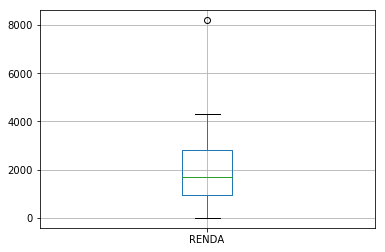

In [14]:
quantils=dados_interesse.RENDA.quantile(np.arange(0,1,.1))
quantils.plot(kind="box",grid=True)



Retirado a parte que não representa a população (os 10% mais ricos), tem-se uma melhor analise de dados.

(0, 937]        23.091773
(937, 1874]     30.509440
(1874, 2811]    19.876646
(2811, 3748]    10.174318
(3748, 4685]     6.093394
(4685, 5622]     3.801012
(5622, 6559]     2.559747
(6559, 7496]     1.562681
(7496, 8433]     1.390873
(8433, 9370]     0.940118
Name: RENDA, dtype: float64

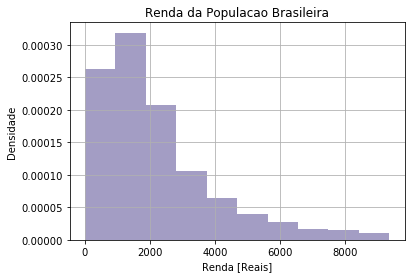

In [15]:
# Separando faixas iguais de renda em salarios minimos

faixa = np.arange(0,10000,937)
sal_min = pd.cut(dados_interesse.RENDA,faixa)
#sal_min.value_counts()
plot = dados_interesse.RENDA.plot.hist(bins=faixa,title="Renda da Populacao Brasileira", normed = 1,color="darkslateblue",alpha=0.5)
plt.xlabel("Renda [Reais]")
plt.ylabel("Densidade")
plt.grid(True)
sal_min.value_counts(sort=False, normalize=True)*100




Esse grafico deixa claro onde está as rendas que representam melhor a população brasileira (entre (0 e 5000)), a partir disso,
a porcentagem  da populacao representada é infima. Temos mais de 50% da populacao brasileira ganhando entre 2 salarios minimos
(até 1900 reais) por exemplo.


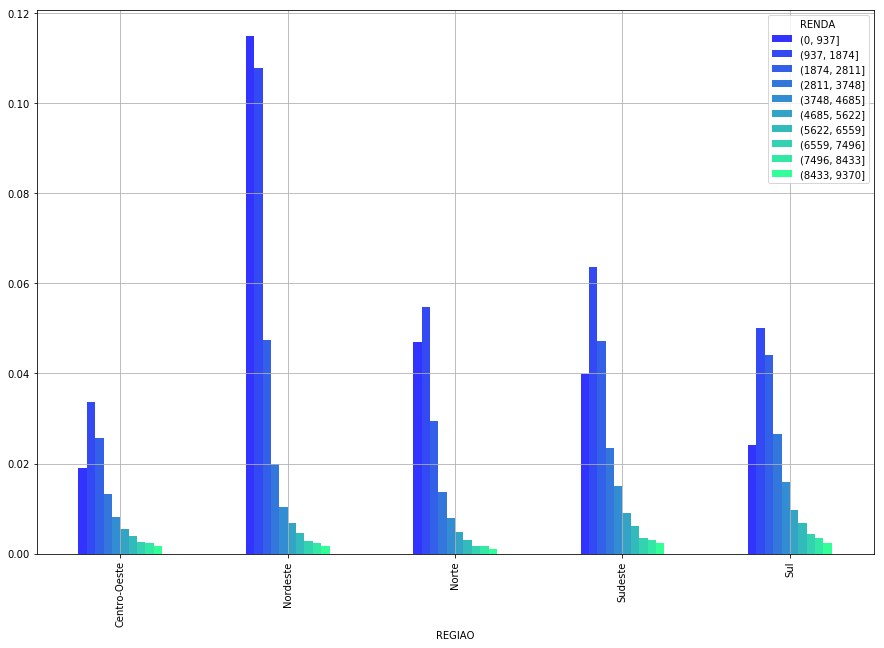

In [16]:
sal_min.value_counts()
sal_reg=pd.crosstab(dados_interesse["REGIAO"],sal_min,normalize = True)
b=sal_reg.sum().sum()
sal_reg*100/b

sal_reg.plot(kind="bar",figsize=(15,10), colormap="winter",alpha=0.8, grid= True)

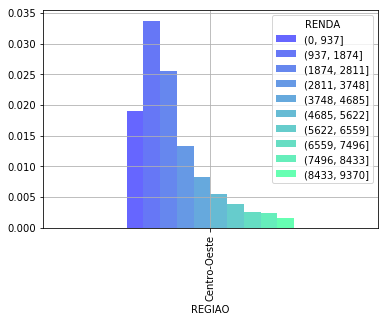

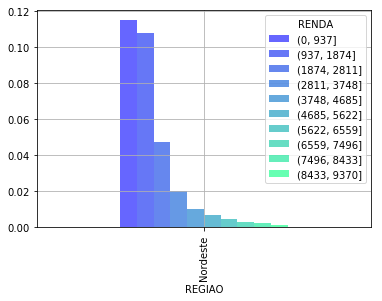

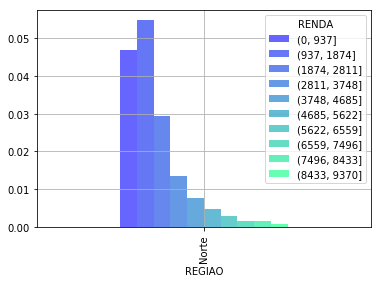

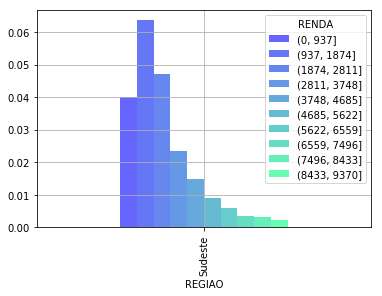

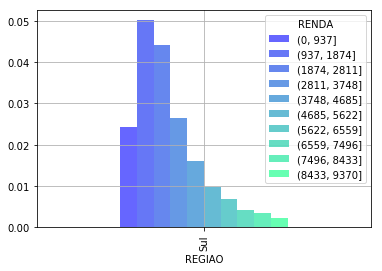

In [17]:
for i in range(5):
    sal_reg[i:i+1].plot(kind="bar",grid = True, colormap ="winter",alpha=0.6)
    

Grande parte da região Nordeste e Norte vive com menos de 3 salarios mínimos, mas representam um grande número da população 
brasileira, algo que pode nos representar um mercado comsumidor em potencial, principalmente para planos mais baratos.

Regiao Sul e sudeste são regioes mais ricas.

Regiao Sudeste possui uma grande população com uma renda media alta, podendo representar um mercado bom para planos 
mais caros (como uma maior velocidade de internet por ex ou planos de 4G).

In [18]:
sal_min.value_counts()
sal_net=pd.crosstab(dados_interesse["ACESSO A INTERNET"],sal_min,normalize = True)
b=sal_net.sum().sum()
sal_net*100/b


RENDA,"(0, 937]","(937, 1874]","(1874, 2811]","(2811, 3748]","(3748, 4685]","(4685, 5622]","(5622, 6559]","(6559, 7496]","(7496, 8433]","(8433, 9370]"
ACESSO A INTERNET,,,,,,,,,,
Nao,19.058144,20.282035,9.376086,3.361839,1.505733,0.735493,0.427590,0.175669,0.165052,0.085904
Sim,4.033628,10.227404,10.500560,6.812478,4.587661,3.065519,2.132157,1.387012,1.225821,0.854214


Ve-se que a partir de 3 salarios mínimos, mais da metade das pessoas possuem acesso à internet, com 2 salarios mínimos
vemos quase equiparado os que possuem internet com os que não possuem. Isso pode significar um mercado favorável para planos 
de inclusão digital, especialmente, para as pessoas dessa faixa, que parecem se interessar mais pela internet.

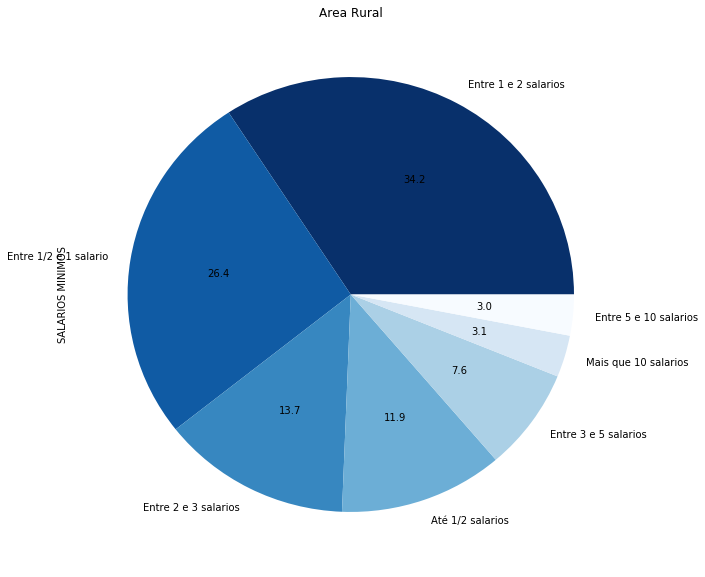

In [19]:
rural_sal=(dados_interesse["SALARIOS MINIMOS"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
rural_sal.plot(kind="pie",autopct="%0.1f", title= "Area Rural", colormap="Blues_r",figsize=(10,10))

Sim    1112
Nao     974
Name: BANDA LARGA, dtype: int64


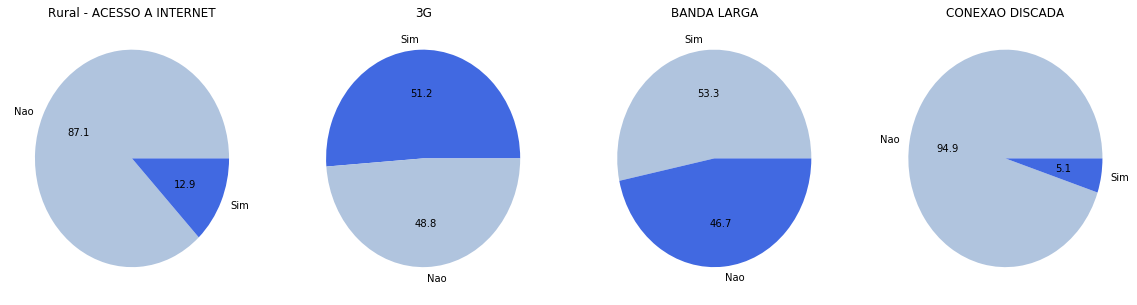

In [31]:
rural_net=(dados_interesse["ACESSO A INTERNET"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
rural_3G= (dados_interesse["3G"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
rural_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
rural_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.URBANIZACAO=="Rural"].value_counts()
print(rural_bl)

f, axarr = plt.subplots(1,4,figsize=(20,5))
axarr[0].pie(rural_net,autopct="%0.1f",labels=rural_net.index,colors=["lightsteelblue","royalblue"])
axarr[0].set_title('Rural - ACESSO A INTERNET')


axarr[1].pie(rural_3G,autopct="%0.1f",labels=rural_3G.index,colors=["royalblue","lightsteelblue"])
axarr[1].set_title('3G')


axarr[2].pie(rural_bl,autopct="%0.1f",labels=rural_bl.index,colors=["lightsteelblue","royalblue"])
axarr[2].set_title('BANDA LARGA')


axarr[3].pie(rural_cd,autopct="%0.1f",labels=rural_cd.index,colors=["lightsteelblue","royalblue"])
axarr[3].set_title('CONEXAO DISCADA')


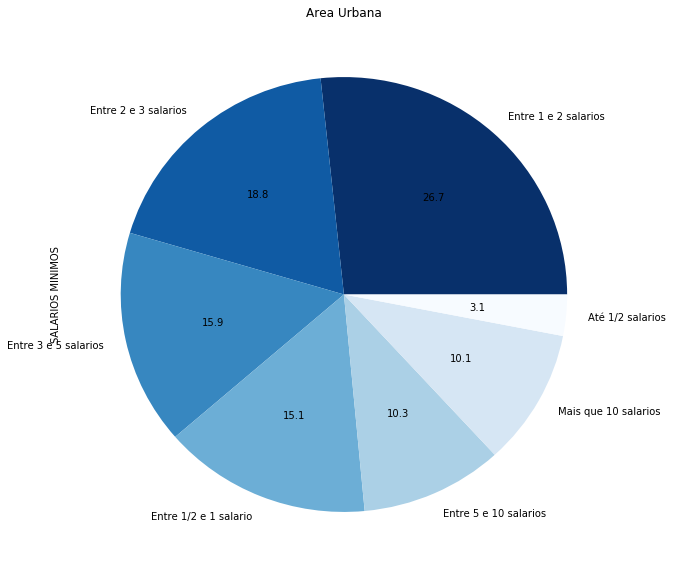

In [21]:
urb_sal=(dados_interesse["SALARIOS MINIMOS"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
urb_sal.plot(kind="pie",autopct="%0.1f", title= "Area Urbana", colormap="Blues_r",figsize=(10,10))


Sim    40014
Nao    12990
Name: BANDA LARGA, dtype: int64
Nao    28570
Sim    24434
Name: 3G, dtype: int64


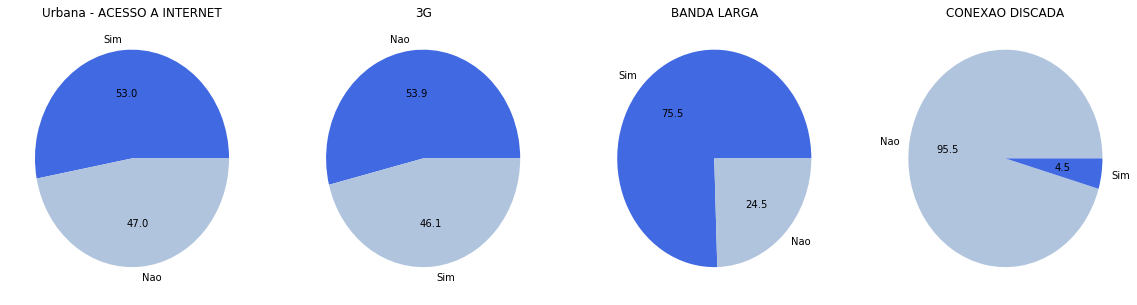

In [32]:
urb_net=(dados_interesse["ACESSO A INTERNET"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
urb_3G= (dados_interesse["3G"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
urb_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
urb_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.URBANIZACAO=="Urbana"].value_counts()
print(urb_bl)
print(urb_3G)

f, axarr = plt.subplots(1,4,figsize=(20,5))
axarr[0].pie(urb_net,autopct="%0.1f",labels=urb_net.index,colors=["royalblue","lightsteelblue"])
axarr[0].set_title('Urbana - ACESSO A INTERNET')


axarr[1].pie(urb_3G,autopct="%0.1f",labels=urb_3G.index,colors=["royalblue","lightsteelblue"])
axarr[1].set_title('3G')


axarr[2].pie(urb_bl,autopct="%0.1f",labels=urb_bl.index,colors=["royalblue","lightsteelblue"])
axarr[2].set_title('BANDA LARGA')


axarr[3].pie(urb_cd,autopct="%0.1f",labels=urb_cd.index,colors=["lightsteelblue","royalblue"])
axarr[3].set_title('CONEXAO DISCADA')

Esses gráficos mostram que a grande maioria da população rural brasileira não tem acesso a internet (80%), enquanto boa parte 
da populacao urbana tem acesso(60%).
Grande parte da população rural que acessa a internet, usa o 3G como meio, pelos dados, acredita-se que a forma mais eficaz
de aumentar o acesso à internet dessa regiao, seria por planos de 3G mais baratos (podendo reduzir a velocidade e o tamanho de
                                                                                   pacotes de dados)
Enquanto a população urbana vemos grande equilibrio entre 3G e banda larga.
Curiosamente, percebe-se, que a conexão discada caiu em desuso em nosso pais (para a alegria de muitos)!

A porcentagem de brasileiros que usa celular é de:  90.2996763977 %


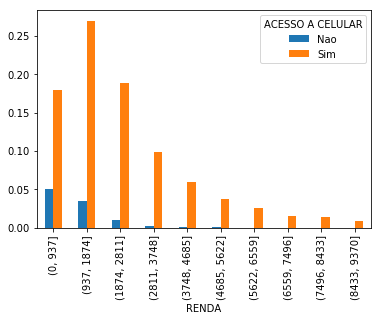

In [23]:
sal_cel=pd.crosstab(sal_min,dados_interesse["ACESSO A CELULAR"],normalize = True)
sal_cel.plot(kind="bar")

x=dados_interesse["ACESSO A CELULAR"].value_counts()
b=x.sum()
print("A porcentagem de brasileiros que usa celular é de: ",(100*x[0]/x.sum()),"%")

Mais de 91% da população brasileira possui celular, sendo assim o mercado de 3G e 4G no brasil possui um enorme potencial.

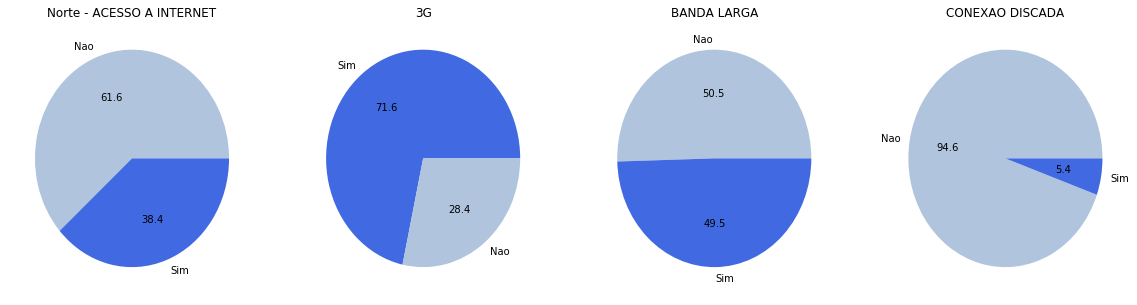

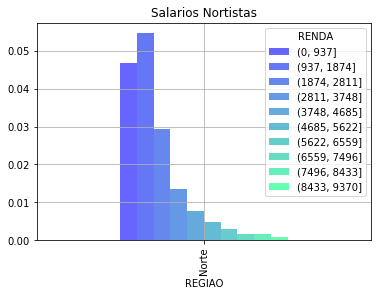

In [24]:
#tive que plotar separado os graficos pois plotar graficos de cada regiao em um for travava
net_nort= (dados_interesse["ACESSO A INTERNET"])[dados_interesse.REGIAO=="Norte"].value_counts()
nort_3G= (dados_interesse["3G"])[dados_interesse.REGIAO=="Norte"].value_counts()
nort_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.REGIAO=="Norte"].value_counts()
nort_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.REGIAO=="Norte"].value_counts()


f, axarr = plt.subplots(1,4,figsize=(20,5))
axarr[0].pie(net_nort,autopct="%0.1f",labels=net_nort.index,colors=["lightsteelblue","royalblue"])
axarr[0].set_title('Norte - ACESSO A INTERNET')


axarr[1].pie(nort_3G,autopct="%0.1f",labels=nort_3G.index,colors=["royalblue","lightsteelblue"])
axarr[1].set_title('3G')


axarr[2].pie(nort_bl,autopct="%0.1f",labels=nort_bl.index,colors=["lightsteelblue","royalblue"])
axarr[2].set_title('BANDA LARGA')

axarr[3].pie(nort_cd,autopct="%0.1f",labels=nort_cd.index,colors=["lightsteelblue","royalblue"])
axarr[3].set_title('CONEXAO DISCADA')

sal_reg[2:3].plot(kind="bar",grid = True, colormap ="winter",alpha=0.6,title="Salarios Nortistas")


De acordo com esses dados, a empresa de telecomunicação que deseja expandir suas vendas para regiao norte, pode ter sucesso,
concentrando suas vendas de planos para o serviço de 3G, pois, dos 47% que acessam internet, 82% acessam por 3G, 
mostrando a preferencia da regiao por esse tipo de serviço, a empresa deve-se concentrar para aumentar o número de pessoas
que acessam a internet(47%).

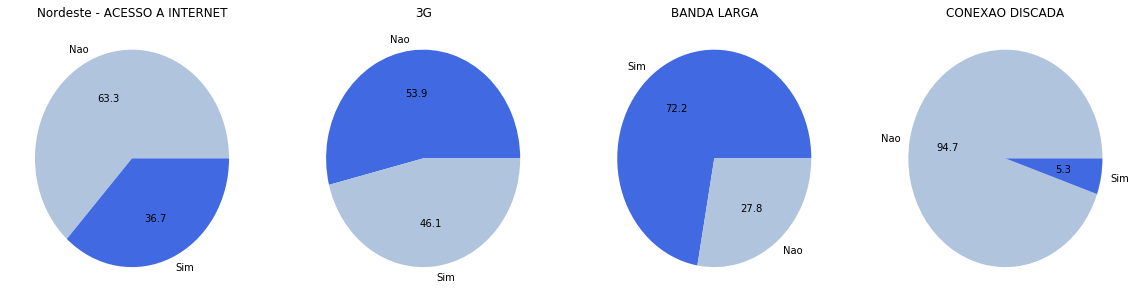

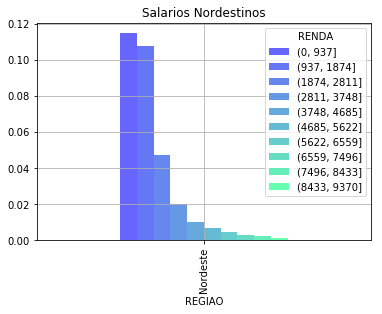

In [25]:
net_nord= (dados_interesse["ACESSO A INTERNET"])[dados_interesse.REGIAO=="Nordeste"].value_counts()
nord_3G= (dados_interesse["3G"])[dados_interesse.REGIAO=="Nordeste"].value_counts()
nord_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.REGIAO=="Nordeste"].value_counts()
nord_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.REGIAO=="Nordeste"].value_counts()

f, axarr = plt.subplots(1,4,figsize=(20,5))
axarr[0].pie(net_nord,autopct="%0.1f",labels=net_nord.index,colors=["lightsteelblue","royalblue"])
axarr[0].set_title('Nordeste - ACESSO A INTERNET')


axarr[1].pie(nord_3G,autopct="%0.1f",labels=nord_3G.index,colors=["royalblue","lightsteelblue"])
axarr[1].set_title('3G')


axarr[2].pie(nord_bl,autopct="%0.1f",labels=nord_bl.index,colors=["royalblue","lightsteelblue"])
axarr[2].set_title('BANDA LARGA')

axarr[3].pie(nord_cd,autopct="%0.1f",labels=nord_cd.index,colors=["lightsteelblue","royalblue"])
axarr[3].set_title('CONEXAO DISCADA')
sal_reg[1:2].plot(kind="bar",grid = True, colormap ="winter",alpha=0.6,title="Salarios Nordestinos")


No nordeste existe um grande mercado em potencial, populacao grande e um grande numero de pessoas que ainda não tem acesso a 
internet, a empresa pode investir em planos promocionais (básicos) conjuntos de 3G e Banda Larga (devido a uma media 
                                                                                                  menor de salario).

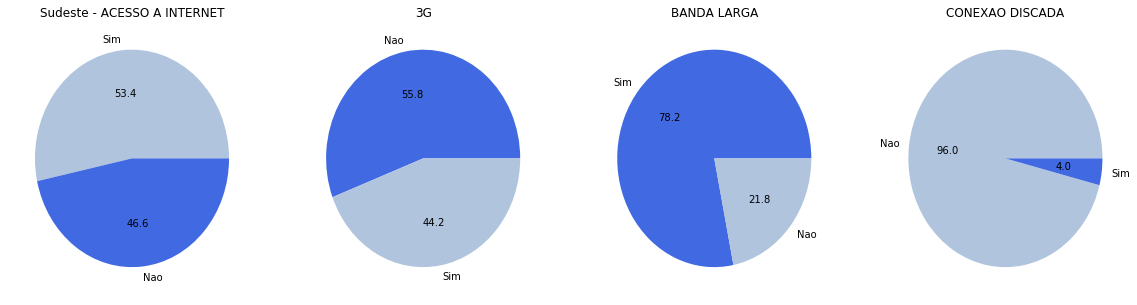

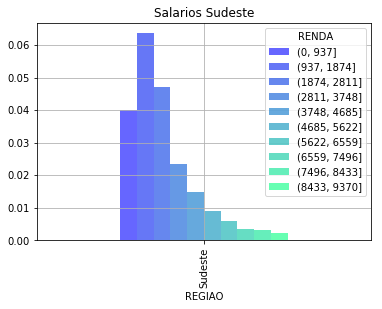

In [26]:
net_sud= (dados_interesse["ACESSO A INTERNET"])[dados_interesse.REGIAO=="Sudeste"].value_counts()
sud_3G= (dados_interesse["3G"])[dados_interesse.REGIAO=="Sudeste"].value_counts()
sud_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.REGIAO=="Sudeste"].value_counts()
sud_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.REGIAO=="Sudeste"].value_counts()

f, axarr = plt.subplots(1,4,figsize=(20,5))
axarr[0].pie(net_sud,autopct="%0.1f",labels=net_sud.index,colors=["lightsteelblue","royalblue"])
axarr[0].set_title('Sudeste - ACESSO A INTERNET')


axarr[1].pie(sud_3G,autopct="%0.1f",labels=sud_3G.index,colors=["royalblue","lightsteelblue"])
axarr[1].set_title('3G')


axarr[2].pie(sud_bl,autopct="%0.1f",labels=sud_bl.index,colors=["royalblue","lightsteelblue"])
axarr[2].set_title('BANDA LARGA')

axarr[3].pie(sud_cd,autopct="%0.1f",labels=sud_cd.index,colors=["lightsteelblue","royalblue"])
axarr[3].set_title('CONEXAO DISCADA')

sal_reg[3:4].plot(kind="bar",grid = True, colormap ="winter",alpha=0.6,title="Salarios Sudeste")

In [27]:
###

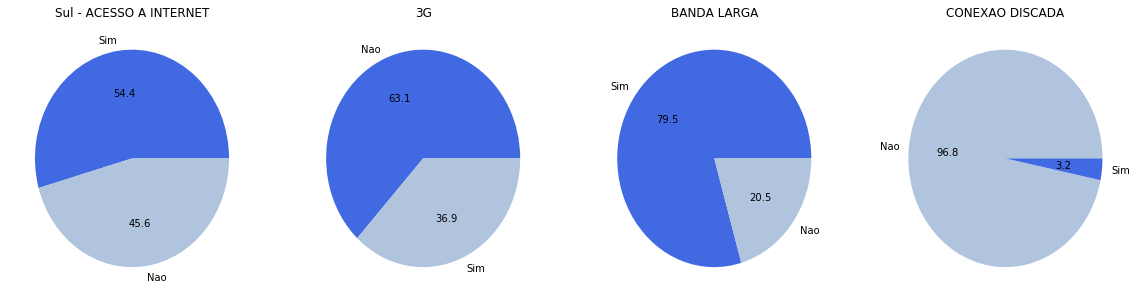

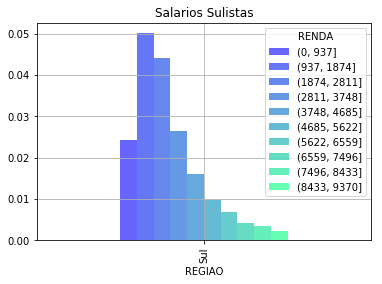

In [28]:
sul_net=(dados_interesse["ACESSO A INTERNET"])[dados_interesse.REGIAO=="Sul"].value_counts()
sul_3G= (dados_interesse["3G"])[dados_interesse.REGIAO=="Sul"].value_counts()
sul_bl= (dados_interesse["BANDA LARGA"])[dados_interesse.REGIAO=="Sul"].value_counts()
sul_cd= (dados_interesse["CONEXAO DISCADA"])[dados_interesse.REGIAO=="Sul"].value_counts()


f, axarr = plt.subplots(1,4,figsize=(20,5))
axarr[0].pie(sul_net,autopct="%0.1f",labels=sul_net.index,colors=["royalblue","lightsteelblue"])
axarr[0].set_title('Sul - ACESSO A INTERNET')


axarr[1].pie(sul_3G,autopct="%0.1f",labels=sul_3G.index,colors=["royalblue","lightsteelblue"])
axarr[1].set_title('3G')


axarr[2].pie(sul_bl,autopct="%0.1f",labels=sul_bl.index,colors=["royalblue","lightsteelblue"])
axarr[2].set_title('BANDA LARGA')


axarr[3].pie(sul_cd,autopct="%0.1f",labels=sul_cd.index,colors=["lightsteelblue","royalblue"])
axarr[3].set_title('CONEXAO DISCADA')
sal_reg[4:5].plot(kind="bar",grid = True, colormap ="winter",alpha=0.6,title="Salarios Sulistas")

Na regiao Sul, que possui uma média de salários alta (uma das maiores do brasil),como vimos anteriormente,
a area de planos para 3G possui um grande potencial de crescimento, visto que + de 90% da população brasileira possui celular
e esta e uma regiao muito rica.

In [29]:
dados_interesse.to_csv("filtrado2013.csv")

___
## Conclusão 

Descreva aqui suas conclusões!